# Deep Learning
## Practical Session 01
Görkem Saygili & Busra Ozgode Yigin, Department of Cognitive Science and Artificial Intelligence – Tilburg University

In this worksheet, we will introduce two datasets for regression and classification; [World Happiness Report Dataset](https://www.kaggle.com/datasets/unsdsn/world-happiness) and [Churn Modelling Dataset](https://www.kaggle.com/datasets/shrutimechlearn/churn-modelling?select=Churn_Modelling.csv).

The goal of the exercise is to build and use a simple feedforward neural networks to perform "regression", that is predict a continuous value based on some input variables. Examples of regression problems are predicting the temperature tomorrow, given meteorological data, or predicting the time that a software project will take to be completed, given its specifications.

In this serie of  tutorials, we will use Keras deep learning library. Keras provides a high-level API for TensorFlow, CNTK, or Theano. Written in Python, it was developed with a focus on enabling easy and fast experimentation with deep neural networks, abstracting away some of its complexity. Before we start, we have to import it:

In [1]:
import keras
keras.__version__

'2.7.0'

## World Happiness Report Dataset

The World Happiness Report is a landmark survey of the state of global happiness. This dataset contains the Happiness Score for 156 countries along with the factors used to explain the score. The happiness scores and rankings data has been collected by asking individuals to rank their life from 0 (worst possible life) to 10 (best possible life).


## Loading Dataset

In [3]:
import pandas as pd
import numpy as np

df_2015 = pd.read_csv('2015.csv')
df_2016 = pd.read_csv('2016.csv')

We will use two different .csv file for years 2015 and 2016. In each file there are different number of samples and features. The total 11 features in the dataset are as follow:

0. Country: The country in question

1. Region: The region that the country belongs to (different than continent)

2. Happiness Rank: Rank of the country based on the Happiness Score.

3. Happiness Score: A metric measured by asking the subjects the question: "How would you rate your happiness on a scale of 0 to 10 where 10 is the happiest."

4. Standard Error: The standard error of the happiness score.

5. Economy (GDP per Capita): individuals rank the quality of life based on the amount they earn

6. Family: quality of family life, nuclear and joint family

7. Health: ranking healthcare availability and average life expectancy in the country

8. Freedom: how much an individual is able to conduct themselves based on their free will

9. Trust: in the government to not be corrupt

10. Generosity: how much their country is involved in peacekeeping and global aid

11. Dystopia Residual: Dystopia happiness score (1.85) i.e. the score of a hypothetical country that has a lower rank than the lowest ranking country on the report, plus the residual value of each country (a number that is left over from the normalization of the variables which cannot be explained).

Happiness Score will be our target values. We need some preprocessing steps to rearrange the features of the dataset for each year.

## Preprocessing 
Rearranging the columns of each data so that they can be joined.

In [4]:
df_2015_2 = df_2015.drop(['Country','Region','Happiness Rank','Standard Error','Dystopia Residual'], axis=1, inplace=False)
df_2015_2.head()

,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity
0,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678
1,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630
2,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139
3,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699
4,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811


In [5]:

df_2016_2 = df_2016.drop(['Country','Region','Happiness Rank','Lower Confidence Interval','Upper Confidence Interval','Dystopia Residual'], axis=1, inplace=False)
df_2016_2.head()

,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity
0,7.526,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171
1,7.509,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083
2,7.501,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678
3,7.498,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895
4,7.413,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492


We can use 'concat' function from pandas library to concatanate two data file.





In [6]:
final_df= pd.concat([df_2015_2, df_2016_2], axis=0)
print(final_df.shape)

(315, 7)


In [7]:
final_df.describe()

,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity
count,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000
mean,5.378949,0.899837,0.892647,0.594054,0.399896,0.140532,0.239957
std,1.141531,0.410780,0.286718,0.240790,0.150684,0.115490,0.130077
min,2.839000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.510000,0.594900,0.739880,0.419645,0.295890,0.061315,0.151430
50%,5.286000,0.973060,0.937930,0.640450,0.413190,0.106130,0.218540
75%,6.269000,1.229000,1.087360,0.787640,0.516730,0.178610,0.311450
max,7.587000,1.824270,1.402230,1.025250,0.669730,0.551910,0.819710


In [8]:
final_df.isnull().sum()

Happiness Score                  0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
dtype: int64

In [9]:
input_cols = final_df.columns.drop('Happiness Score')
target_cols= ['Happiness Score']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(final_df[input_cols], final_df[target_cols], test_size= 0.2, shuffle=True, random_state=42)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(252, 6)
(63, 6)
(252, 1)
(63, 1)


## Exercise 1 - Preparing the data


The features composing the input data have different scales. For instance some values are proportions, which take values between 0 and 1, others take values between 1 and 12, others between 0 and 100... It would be problematic to feed into a neural network values that all take wildly different ranges. The network might be able to automatically adapt to such heterogeneous data, but it would definitely make learning more difficult. A widespread best practice to deal with such data is to do feature-wise standardization: for each feature in the input data (a column in the input data matrix), we will subtract the mean of the feature and divide by the standard deviation, so that the feature will be centered around 0 and will have a unit standard deviation.
<br><br>

<center><span style="font-size: 150%">$ x_{standardized} = \frac{x - \mu}{\sigma} $</span></center>

<div class="alert alert-block alert-warning">
    <b>Note:</b>
    The quantities that we use for normalizing the test data have to be computed using the training data. We should never use in our workflow any quantity computed on the test data, even for something as simple as data normalization.
</div>

In [10]:
# Standardization of training and testing input data

### PUT YOUR CODE HERE ###
# Computing mean and standard deviation of the training data
mean = X_train.mean(axis=0)
std = X_train.std(axis=0)

# Standardizing training and test data
X_train = (X_train - mean) / std
X_test = (X_test - mean) / std
### END ###

## Exercise 2 - Building our network

Because so few samples are available, we will be using a very small network with two hidden layers, each with 64 units. In general, the less training data you have, the worse overfitting will be, and using a small network is one way to mitigate overfitting.

To instantiate the model, we will use [a sequential model](https://keras.io/getting-started/sequential-model-guide), which allows to create a neural network simply by stacking layers. Given some input data, Keras can then automatically perform the forward pass for us based on the network's definition. Backpropagation of the error is also handled automatically by the framework given an optimizer and a loss function (specified when we `compile` the model).

`Dense` layer implements the operation: output = activation(dot(input, kernel) + bias) where activation is the element-wise activation function passed as the activation argument, kernel is a weights matrix created by the layer, and bias is a bias vector created by the layer (only applicable if use_bias is True).

Create a sequential model and add the three layers (two hidden layers + the output layer). We will use the ReLU activation function for the two hidden layers. Compile the model using the `rmsprop` optimizer, an appropriate loss and the mean absolute error (`mae`) metric.

In [11]:
from keras import models
from keras import layers
from keras import Input

def build_model():
    # Because we will need to instantiate
    # the same model multiple times,
    # we use a function to construct it.
    
    ### PUT YOUR CODE HERE ###
    model = models.Sequential()
    #input shape can be added sperately in an Input layer or in the first Dense layer.
    #model.add(Input(shape=(X_train.shape[1],))) 
    model.add(layers.Dense(64, activation='relu',
                           input_shape=(X_train.shape[1],)))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(1))
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    
    ### END ###
    
    return model

<div class="alert alert-block alert-info">
<b>Additional information</b>
    
Our network ends with a single unit, and no activation (i.e. it will be a linear layer). This is a typical setup for scalar regression (i.e. regression where we are trying to predict a single continuous  value). Applying an activation function would constrain the range that the output can take; for instance if we applied a `sigmoid` activation function to our last layer, the network could only learn to predict values between 0 and 1. Here, because the last layer is purely linear, the network is free to learn to predict values in any range.

Note that we are compiling the network with the `mse` loss function -- Mean Squared Error, the square of the difference between the predictions and the targets, a widely used loss function for regression problems.
    
We are also monitoring a new metric during training: `mae`. This stands for Mean Absolute Error. It is simply the absolute value of the difference between the predictions and the targets.
</div>

## Exercise 3 - Visualizing the network

You can check the architecture of your network with the `summary` function: 

In [12]:
# Remove some unwanted warnings
import logging
logging.getLogger('tensorflow').disabled = True 

model = build_model()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                448       
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 4,673
Trainable params: 4,673
Non-trainable params: 0
_________________________________________________________________


**Question 3.1:** Which category do these layers belong to (input/hidden/output)?

**Question 3.2:** Can you explain the number of parameters assigned to each layer?

<div class="alert alert-block alert-info">
<b>Answer 3.1</b> 
    
`train_data` contains the input values, the first two `Dense` layers (`dense_1` and `dense_2` in the summary) correspond to hidden layers and the last layer (`dense_3`) is the output layer.
<br><br>    
    
<b>Answer 3.2</b>

The first hidden layer contains 6 x 64 weights (number of input features x number of units in the layer) + 64 biases (one per unit), that is 448 parameters in total. Similarly, the second hidden layer as (64 x 64) + 64 = 4160 parameters and the last layer (composed of 1 unit only) 64 * 1 + 1 = 65 parameters.
</div>

You can also get direct access to the different sets of parameters and display them:

In [13]:
for i, layer in enumerate(model.layers):
    weights = layer.get_weights() # list of numpy arrays
    print("Layer ", str(i))
    print("First set of parameters, size:", len(weights[0]), "x", len(weights[0][0]), "- first value:", weights[0][0][0])
    print("Second set of parameters, size:", "1 x", len(weights[1]), "- first value:", weights[1][0])

Layer  0
First set of parameters, size: 6 x 64 - first value: -0.19943908
Second set of parameters, size: 1 x 64 - first value: 0.0
Layer  1
First set of parameters, size: 64 x 64 - first value: -0.12852623
Second set of parameters, size: 1 x 64 - first value: 0.0
Layer  2
First set of parameters, size: 64 x 1 - first value: -0.23618484
Second set of parameters, size: 1 x 1 - first value: 0.0


**Question 3.3:** Relate each set of parameters to the following formula describing the operations performed:
<br><br>
<center>
$y = W_3(g(W_2h(W_1x + b_1) + b_2) + b_3$
</center>

**Question 3.4:** How are the different sets of parameters initialized?

<div class="alert alert-block alert-info">
<b>Answer 3.3</b> 
    
The first set of parameters of layer 0 correspond to the weight matrix $W_1$ while the second set correspond to the bias vector $b_1$. Similarly, the python equivalents of $W_2$ and $W_3$ are respectively the first set of parameters of layer 1 and 2, whereas the second set of parameters of each layer correspond to $b_2$ and $b_3$.
<br><br>    
    
<b>Answer 3.4</b>

The weight parameters ($W_x$) are initialized to small random values (positive and negative) while the biases ($b_x$) are set to 0.
</div>

## Exercise 4 - Validating our approach using K-fold validation


To evaluate our network while we keep adjusting  hyperparameters (such as the number of epochs used for training), we could simply split the data into a training set and a validation set. However, because we have so few data points, the validation set would end up being very small (e.g. about 100 examples). A consequence is that our validation scores may change a lot depending on _which_ data points we choose to use for validation and which we choose for training, i.e. the validation scores may have a high _variance_ with regard to the validation split. This would prevent us from reliably evaluating our model.

The best practice in such situations is to use K-fold cross-validation. It consists of splitting the available data into K partitions, then instantiating K identical models, and training each one on K-1 partitions while evaluating on the remaining partition. The validation score for the model used would then be the average of the K validation scores obtained.

Fill in the following code to:
1. Build the model.
2. Train the model (as shown in the [model training example](https://keras.io/guides/training_with_built_in_methods/)) using a batch size of 1. You can use verbose=0 to limit the output produced by the training procedure.
3. Evaluate the model (see e.g. [this example](https://keras.io/guides/training_with_built_in_methods/)).

In [14]:
import numpy as np

k = 4
num_val_samples = len(X_train) // k
num_epochs = 100
all_scores = [] # Should add the score of each run at the end of the loop
for i in range(k):
    print('processing fold #', i)
    # Prepare the validation data: data from partition # k
    val_data = X_train[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = y_train[i * num_val_samples: (i + 1) * num_val_samples]

    # Prepare the training data: data from all other partitions
    partial_train_data = np.concatenate(
        [X_train[:i * num_val_samples],
         X_train[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [y_train[:i * num_val_samples],
         y_train[(i + 1) * num_val_samples:]],
        axis=0)

    ### PUT YOUR CODE HERE ###
    # Build the Keras model (already compiled)
    model = build_model()
    # Train the model
    model.fit(partial_train_data, partial_train_targets,
              epochs=num_epochs, batch_size=1, verbose=0)
    # Evaluate the model on the validation data
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
    all_scores.append(val_mae)
    ### END ###

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3


In [15]:
all_scores

[0.4963889718055725,
 0.4891524016857147,
 0.5460759401321411,
 0.5966809988021851]

In [16]:
np.mean(all_scores)

0.5320745781064034

As you can notice, the different runs do indeed show rather different validation scores (~ from 0.49 to 0.59). Their average (around 0.54) is a much more reliable metric than any single of these scores -- that's the entire point of K-fold cross-validation. In this case, we are off by 0.54 on average, which is still significant considering that the scores range from 2.693 to 7.769. 

Let's try training the network for a bit longer: 250 epochs. To keep a record of how well the model did at each epoch, we will modify our training loop to save the per-epoch training and validation score log:

In [17]:
from keras import backend as K

# Some memory clean-up
K.clear_session()

In [18]:

num_epochs = 250
all_mae_histories = []
val_all_mae_histories = []
for i in range(k):
    print('processing fold #', i)
    # Prepare the validation data: data from partition # k
    val_data = X_train[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = y_train[i * num_val_samples: (i + 1) * num_val_samples]

    # Prepare the training data: data from all other partitions
    partial_train_data = np.concatenate(
        [X_train[:i * num_val_samples],
         X_train[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [y_train[:i * num_val_samples],
         y_train[(i + 1) * num_val_samples:]],
        axis=0)

    # Build the Keras model (already compiled)
    model = build_model()
    # Train the model (in silent mode -> verbose=0)
    history = model.fit(partial_train_data, partial_train_targets,
                        validation_data=(val_data, val_targets),
                        epochs=num_epochs, batch_size=4, verbose=0)
    mae_history = history.history['mae']
    all_mae_histories.append(mae_history)
    val_mae_history = history.history['val_mae']
    val_all_mae_histories.append(val_mae_history)

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3


We can then compute the average of the per-epoch MAE scores for all folds:

In [19]:
average_mae_history = [
    np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]
val_average_mae_history = [
    np.mean([x[i] for x in val_all_mae_histories]) for i in range(num_epochs)]

Let's plot this:

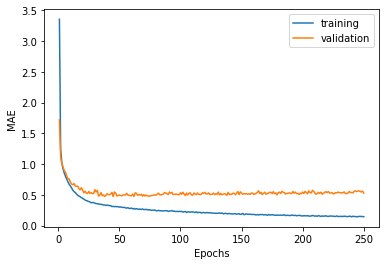

In [20]:
%matplotlib inline #it will make your plot outputs appear and be stored within the notebook.
import matplotlib.pyplot as plt

plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.plot(range(1, len(val_average_mae_history) + 1), val_average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend(['training', 'validation'])
plt.show()

It may be a bit hard to see the plot due to scaling issues and relatively high variance. Let's:

* Omit the first 10 data points, which are on a different scale from the rest of the curve.
* Replace each point with an exponential moving average of the previous points, to obtain a smooth curve.

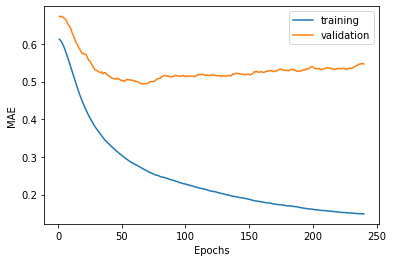

In [21]:
def smooth_curve(points, factor=0.9):
  smoothed_points = []
  for point in points:
    if smoothed_points:
      previous = smoothed_points[-1]
      smoothed_points.append(previous * factor + point * (1 - factor))
    else:
      smoothed_points.append(point)
  return smoothed_points

smooth_mae_history = smooth_curve(average_mae_history[10:])
val_smooth_mae_history = smooth_curve(val_average_mae_history[10:])

plt.plot(range(1, len(smooth_mae_history) + 1), smooth_mae_history)
plt.plot(range(1, len(val_smooth_mae_history) + 1), val_smooth_mae_history)
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend(['training', 'validation'])
plt.show()

According to this plot, it seems that validation MAE stops improving significantly after ~60 epochs. Past that point, we start overfitting.

Once we are done tuning other parameters of our model with K-fold cross-validation (besides the number of epochs, we could also adjust the size of the hidden layers, their number, etc.), we can train a final "production" model on all of the training data, with the best parameters, then look at its performance on the test data:

In [22]:
# Get a fresh, compiled model.
model = build_model()
# Train it on the entirety of the data.
model.fit(X_train, y_train,
          epochs=60, batch_size=4, verbose=0)
test_mse_score, test_mae_score = model.evaluate(X_test, y_test)

2/2 [==============================] - 0s 2ms/step - loss: 0.3464 - mae: 0.4978


In [23]:
test_mae_score

0.49784043431282043

We are still off by about 0.49.

## Part 2 - Churn Prediction For Bank Customer: a binary classification example

We have a dataset in which there are details of a bank's customers and the target variable is a binary variable reflecting the fact whether the customer left the bank (closed his account) or he continues to be a customer. We will use [Churn Modelling Dataset](https://www.kaggle.com/datasets/shrutimechlearn/churn-modelling?select=Churn_Modelling.csv) for binary classification.

The features in the given dataset are:

Rownumber: Row Numbers from 1 to 10000

Customerid: A unique ID that identifies each customer.

Surname: The customer’s surname.

Creditscore: A credit score is a number between 300–850 that depicts a consumer's creditworthiness.

Geography: The country from which the customer belongs to.

Gender: The customer’s gender: Male, Female

Age: The customer’s current age, in years, at the time of being customer.

Tenure: The number of years for which the customer has been with the bank.

Balance: Bank balance of the customer.

Numofproducts: the number of bank products the customer is utilising.

Hascrcard: The number of credit cards given to the customer by the bank.

Isactivemember: Binary Flag for indicating if the client is active or not with the bank before the moment where the client exits the company (recorded in the variable "exited")

EstimatedSalary: The estimated salary of the customer

Exited: Binary flag 1 if the customer closed account with bank and 0 if the customer is retained.

In [54]:
import pandas as pd
dataset = pd.read_csv('Churn_Modelling.csv')
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [55]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


### Data Preprocessing

In [56]:
X = dataset.iloc[:, 3:-1].values
y = dataset.iloc[:, -1].values

In [57]:
print(X)

[[619 'France' 'Female' ... 1 1 101348.88]
 [608 'Spain' 'Female' ... 0 1 112542.58]
 [502 'France' 'Female' ... 1 0 113931.57]
 ...
 [709 'France' 'Female' ... 0 1 42085.58]
 [772 'Germany' 'Male' ... 1 0 92888.52]
 [792 'France' 'Female' ... 1 0 38190.78]]


In [58]:
print(y)

[1 0 1 ... 1 1 0]


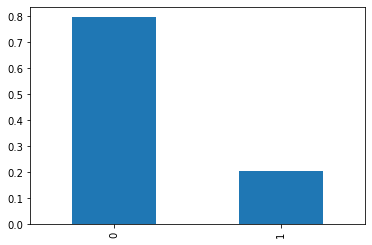

In [59]:
dataset['Exited'].value_counts(normalize=True).plot.bar();

#### Encoding categorical data

Label Encoding the "Gender" column

In [60]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X[:, 2] = le.fit_transform(X[:, 2])

In [61]:
print(X)

[[619 'France' 0 ... 1 1 101348.88]
 [608 'Spain' 0 ... 0 1 112542.58]
 [502 'France' 0 ... 1 0 113931.57]
 ...
 [709 'France' 0 ... 0 1 42085.58]
 [772 'Germany' 1 ... 1 0 92888.52]
 [792 'France' 0 ... 1 0 38190.78]]


One Hot Encoding the "Geography" column

In [62]:
import numpy as np
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

In [63]:
print(X)

[[1.0 0.0 0.0 ... 1 1 101348.88]
 [0.0 0.0 1.0 ... 0 1 112542.58]
 [1.0 0.0 0.0 ... 1 0 113931.57]
 ...
 [1.0 0.0 0.0 ... 0 1 42085.58]
 [0.0 1.0 0.0 ... 1 0 92888.52]
 [1.0 0.0 0.0 ... 1 0 38190.78]]


You should notice that OneHotEncoder encodes 'France' as '1,0,0', 'Spain' as '0,0,1', 'Germany' as '0,1,0'.

### Exercise 5: Splitting the dataset into the Training, Validation and Test set

Split the dataset as following: Training set (60%), Validation set (20%), Test set (20%).

In [64]:
from sklearn.model_selection import train_test_split

### PUT YOUR CODE HERE ###
X_trainval, X_test, y_trainval, y_test = train_test_split(X, y, test_size = 0.2, stratify=y, random_state = 0)
X_train, X_val, y_train, y_val = train_test_split(X_trainval, y_trainval, test_size = 0.25, stratify=y_trainval, random_state = 42)
### END ###
print(X_train.shape, X_val.shape, X_test.shape)

(6000, 12) (2000, 12) (2000, 12)


### Feature Scaling

In [65]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_val = sc.transform(X_val)
X_test = sc.transform(X_test)

### Exercise 6: Building and training a network for binary classification

Reusing what you have seen during the previous exercise, try to build and train a neural network for binary classification on the dataset we have just created. Keep the same number of layers we have used before and reduce the number units to 32 and 16, respectively as well as the ReLU activation function for the hidden layers. Use a batch size of 32 and 150 epochs for training. Use rmsprop as optimizer, and binary_crossentropy as loss function and set the metric as accuracy.

In [66]:
from keras import models
from keras import layers
### PUT YOUR CODE HERE ###
def build_model():
    model = models.Sequential()
    model.add(layers.Dense(32, activation='relu',
                           input_shape=(X_train.shape[1],)))
    model.add(layers.Dense(16, activation='relu'))
    model.add(layers.Dense(1, activation='sigmoid'))
    model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
    
    return model

# Build the Keras model (already compiled)
model = build_model()
# Train the model (in silent mode -> verbose=0)
print('Training...')
history = model.fit(X_train, y_train,
                    validation_data=(X_val, y_val),
                    epochs=150, batch_size=32, verbose=0)
print('Training done.')
### END ###

Training...
Training done.


Plot the training and validation accuracy history

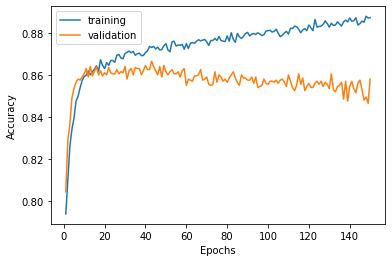

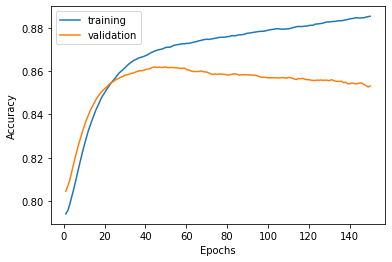

In [67]:

acc_history = history.history['accuracy']
val_acc_history = history.history['val_accuracy']

plt.plot(range(1, len(acc_history) + 1), acc_history)
plt.plot(range(1, len(val_acc_history) + 1), val_acc_history)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['training', 'validation'])
plt.show()

smooth_acc_history = smooth_curve(acc_history)
val_smooth_acc_history = smooth_curve(val_acc_history)

plt.plot(range(1, len(smooth_acc_history) + 1), smooth_acc_history)
plt.plot(range(1, len(val_smooth_acc_history) + 1), val_smooth_acc_history)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['training', 'validation'])
plt.show()

In [68]:
##Rescale for whole training set (X_trval)
X_trainval, X_test, y_trainval, y_test = train_test_split(X, y, test_size = 0.2, stratify=y, random_state = 0)

sc = StandardScaler()
X_trainval = sc.fit_transform(X_trainval)
X_test = sc.transform(X_test)
print(X_trainval.shape, y_trainval.shape)

(8000, 12) (8000,)


Train the final model on the whole training set, evaluate the model on test set.

In [69]:
# Training the final model and the whole training set
### PUT YOUR CODE HERE ###
model = build_model()
# Train it on the entirety of the data.
model.fit(X_trainval, y_trainval,
          epochs=50, batch_size=32, verbose=0)
test_loss_score, test_acc_score = model.evaluate(X_test, y_test)
print("Test accuracy:", test_acc_score)
### END ###

63/63 [==============================] - 0s 3ms/step - loss: 0.3640 - accuracy: 0.8530
Test accuracy: 0.8529999852180481


In [72]:
y_pred = model.predict(X_test)
print(y_pred)
y_pred = (y_pred > 0.5)
print(y_pred)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[0.07675067]
 [0.12055892]
 [0.02248731]
 ...
 [0.02310494]
 [0.9999846 ]
 [0.03758153]]
[[False]
 [False]
 [False]
 ...
 [False]
 [ True]
 [False]]
[[0 1]
 [0 0]
 [0 0]
 ...
 [0 0]
 [1 1]
 [0 0]]


In [71]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[1529   64]
 [ 230  177]]


0.853

### Exercise 7: Use our ANN model to predict if the customer with the following informations will leave the bank: 

Geography: France

Credit Score: 600

Gender: Male

Age: 40 years old

Tenure: 3 years

Balance: \$ 60000

Number of Products: 2

Does this customer have a credit card ? Yes

Is this customer an Active Member: Yes

Estimated Salary: \$ 50000

So, should we say goodbye to that customer ? 


In [209]:
### PUT YOUR CODE HERE ###

print(model.predict(sc.transform([[1, 0, 0, 600, 1, 40, 3, 60000, 2, 1, 1, 50000]])) > 0.5)

### END ###

[[False]]


Therefore, our ANN model predicts that this customer stays in the bank!

**Important note 1:** Notice that the values of the features were all input in a double pair of square brackets. That's because the "predict" method always expects a 2D array as the format of its inputs. And putting our values into a double pair of square brackets makes the input exactly a 2D array.

**Important note 2:** Notice also that the "France" country was not input as a string in the last column but as "1, 0, 0" in the first three columns. That's because of course the predict method expects the one-hot-encoded values of the state, and as we see in the first row of the matrix of features X, "France" was encoded as "1, 0, 0". And be careful to include these values in the first three columns, because the dummy variables are always created in the first columns.

# Wrapping up


Here's what you should take away from this example:

* Regression is commonly done using the Mean Squared Error (MSE) loss, while binary classification uses the binary cross-entropy loss.
* Common metric are Mean Absolute Error (MAE) for regression and accuracy for classification.
* When features in the input data have values in different ranges, each feature should be scaled independently as a preprocessing step.
* When there is little data available, using K-Fold validation is a great way to reliably evaluate a model.
* When little training data is available, it is preferable to use a small network with very few hidden layers (typically only one or two), in order to avoid severe overfitting.
